### Plotting with Pandas DataFrame

In [149]:
import pandas as pd

# read .csv, I've downloaded csv file here. https://github.com/CSSEGISandData/COVID-19/tree/master/csse_covid_19_data
file_url = 'https://raw.githubusercontent.com/actruce/PythonLibraries/master/Matplotlib/data/time_series_covid19_gloabal.csv'
df_org = pd.read_csv(file_url)

Let's do some pre-processing !

In [159]:
df_china = df_org.copy()
df_china = df_china[df_china['Country/Region'].isin(['China'])]
df_china = df_china.groupby('Country/Region').agg('sum')
df_china.drop(['Lat', 'Long'], axis=1, inplace=True)

In [161]:
df = df_org.copy()
df = df[df['Country/Region'].isin(['Korea, South', 'Japan', 'US', 'Italy'])]
df = df.iloc[:, 1:]
df.drop(['Lat', 'Long'], axis=1, inplace=True)
df.set_index(['Country/Region'], inplace=True)

In [162]:
df = pd.concat((df, df_china))
df = df.T
df.index.rename('Date', inplace=True)

Country/Region,Italy,Japan,"Korea, South",US,China
Date,,,,,
1/22/20,0,2,1,1,548
1/23/20,0,2,1,1,643
1/24/20,0,2,2,2,920
1/25/20,0,2,2,2,1406
1/26/20,0,4,3,5,2075


Text(0, 0.5, 'y-axis lim=100,000')

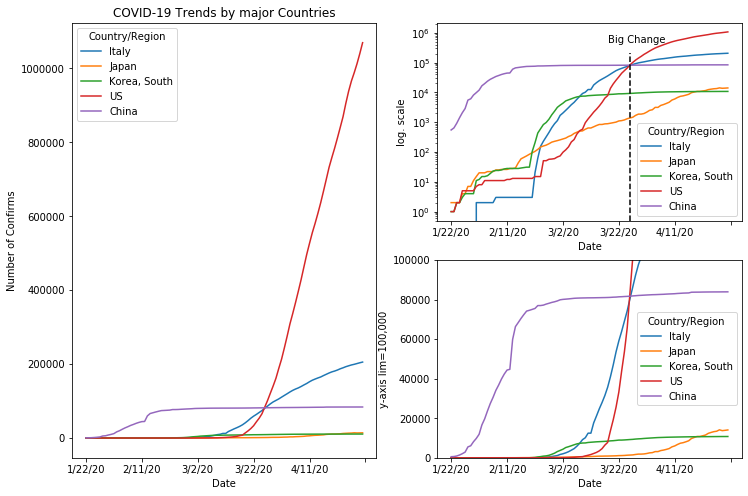

In [252]:
import matplotlib.pyplot as plt
fig = plt.figure(figsize=(12, 8))

ax1 = fig.add_subplot(1,2,1)
df.plot(ax=ax1)
ax1.set_ylabel('Number of Confirms')
ax1.set_title('COVID-19 Trends by major Countries')

ax2 = fig.add_subplot(2,2,2)
df.plot(ax=ax2)
ax2.set_ylabel('log. scale')
ax2.set_yscale('log')
ax2.axvline(x=64, ymin=0, ymax=0.85, c='k', linestyle='--') # add vertical line at ax2
ax2.text(0.56, 0.9, 'Big Change', transform=ax2.transAxes)

ax3 = fig.add_subplot(2,2,4)
df.plot(ax=ax3)
ax3.set_ylim([-1, 100000.])
ax3.set_ylabel('y-axis lim=100,000')